In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
import matplotlib.pyplot as plt

In [7]:
'''
    Some hyperparameters
'''
max_features = 10000
max_len = 500
batch_size = 32

In [8]:
'''
    Very good piece of code to load and pre-process text data
'''
print('....Loading Data')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)


....Loading Data
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [27]:
'''
    A simple RNN using embedding layer and a SimpleRNN layer. 32 is the number of dimensions we wish to 
    embed into. Like 8 in the previous example we did for word embeddings.
'''
model = Sequential()
model.add(Embedding(max_features, 4))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

C:\Users\Vishaal\Anaconda3_Mod\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.6928 - acc: 0.5265 - val_loss: 0.6764 - val_acc: 0.5996
Epoch 2/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.5893 - acc: 0.7030 - val_loss: 0.5903 - val_acc: 0.6976
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4431 - acc: 0.8090 - val_loss: 0.5034 - val_acc: 0.7746
Epoch 4/10
20000/20000 [==============================] - 35s 2ms/step - loss: 0.3626 - acc: 0.8493 - val_loss: 0.3743 - val_acc: 0.8448
Epoch 5/10
20000/20000 [==============================] - 50s 3ms/step - loss: 0.3077 - acc: 0.8788 - val_loss: 0.3661 - val_acc: 0.8430
Epoch 6/10
20000/20000 [==============================] - 43s 2ms/step - loss: 0.2739 - acc: 0.8929 - val_loss: 0.3920 - val_acc: 0.8256
Epoch 7/10
20000/20000 [==============================] - 37s 2ms/step - loss: 0.2363 - acc: 0.9122 - val_loss: 0.3515 - val_acc:

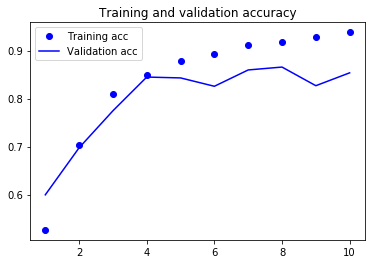

In [28]:
'''
    Plotting accuracy VS epoch for training and validations
'''
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

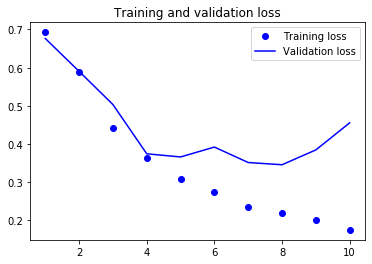

In [29]:
'''
    Plotting loss VS epoch for training and validations
'''
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



In [31]:
'''
    We get an accuracy of 86.4% on the validation set which is not super remarkable. Earlier we got 88% 
    without RNN. This is because we are using simple RNNs. We will explore other types of layers. 
'''
max(history.history['val_acc'])

0.8655999898910522